In [36]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns; sns.set()  


plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [37]:
dataset=np.loadtxt('A.txt', dtype={'names': ('v1', 'v2'),     'formats': ('f8', 'f8')} ) 

In [38]:
len(dataset) 

174

In [39]:
dataset

array([(0.1394, 0.8231), (1.2149, 1.8136), (1.3823, 0.8263),
       (1.3726, 0.8158), (1.3694, 0.8158), (1.3855, 0.8123),
       (1.3919, 0.8053), (1.3694, 0.8123), (1.3661, 0.8123),
       (1.3597, 0.7982), (1.3565, 0.6061), (1.3468, 0.7126),
       (1.3823, 0.7494), (1.3758, 0.7167), (1.3081, 0.7208),
       (1.3339, 0.6757), (1.3403, 0.7453), (1.3306, 0.6798),
       (1.3565, 0.7494), (1.3629, 0.6553), (1.3629, 0.6266),
       (1.3726, 0.6266), (1.3823, 0.6962), (1.3661, 0.774 ),
       (1.3113, 0.7699), (1.3532, 0.7658), (1.3726, 0.7985),
       (1.3855, 0.7044), (1.321 , 0.6675), (1.2984, 0.733 ),
       (0.179 , 0.8354), (0.2177, 0.8558), (0.1823, 0.8272),
       (0.2177, 0.9377), (0.2823, 0.8108), (0.2371, 0.8067),
       (0.2274, 0.9132), (0.279 , 0.8763), (0.2242, 0.9009),
       (0.35  , 0.8968), (0.2565, 0.8436), (0.1855, 0.9132),
       (0.1274, 0.9091), (0.2629, 0.9664), (0.1823, 0.8722),
       (0.2661, 0.9746), (0.1984, 0.9705), (0.2306, 1.0114),
       (0.321 , 0.9418),

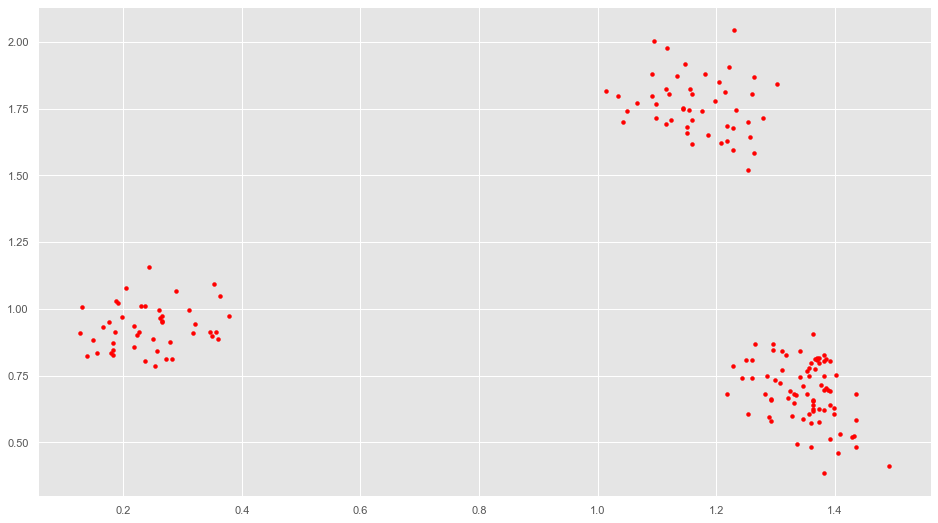

In [40]:
f1 = dataset['v1']
f2 = dataset['v2']
X = np.array(list(zip(f1, f2)))
plt.scatter(f1, f2, c='red', s=15)

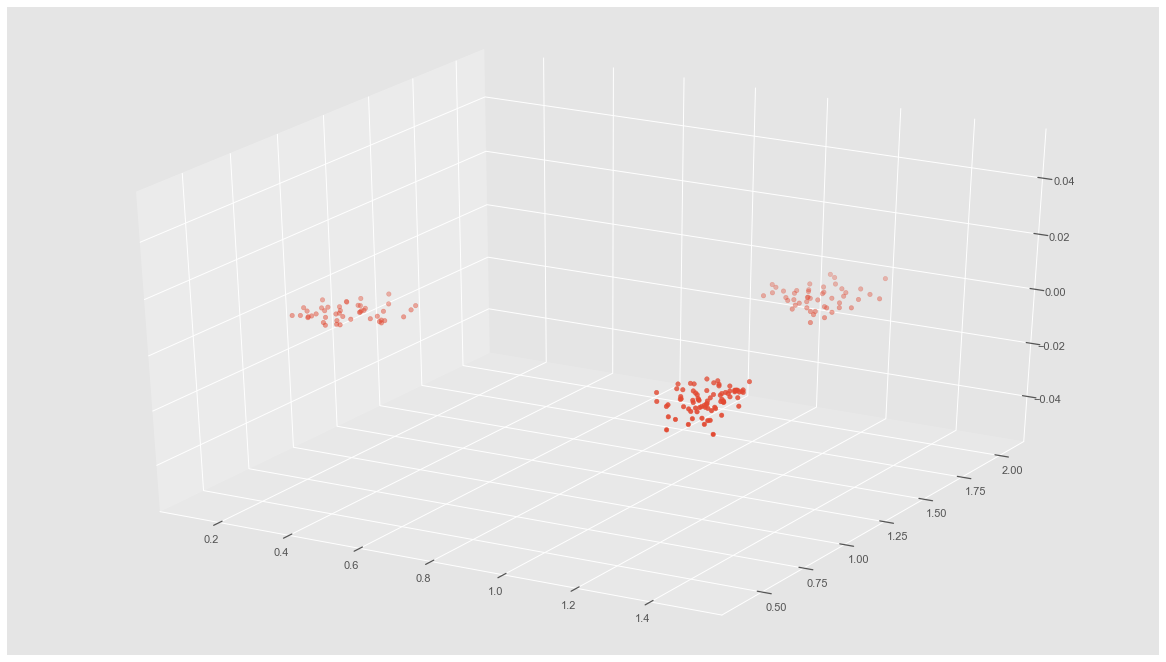

In [41]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1])

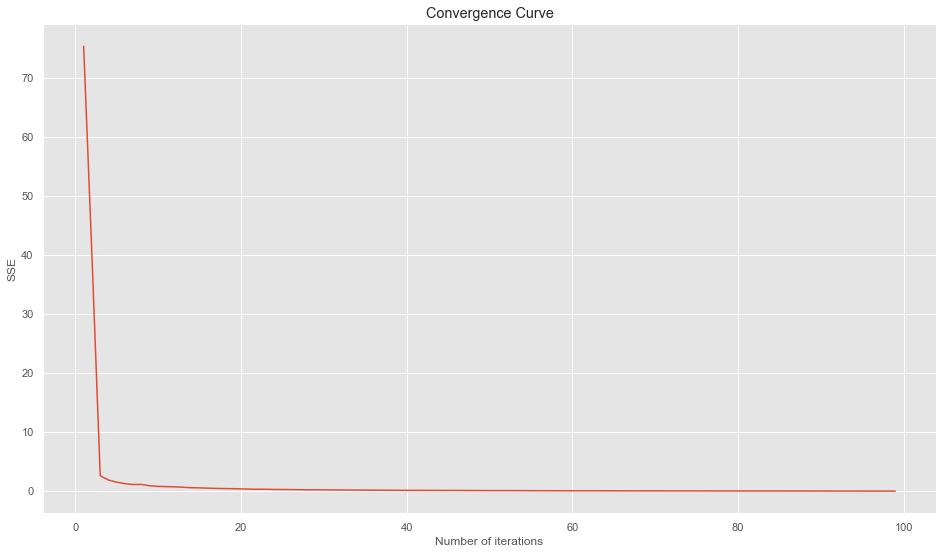

In [50]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,100):
    km=KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=1, random_state=0)
    km.fit(X)
    wcss.append(km.inertia_)
plt.plot(range(1,100),wcss)
plt.title('Convergence Curve')
plt.xlabel('Number of iterations')
plt.ylabel('SSE')
plt.show()
    

In [43]:
import pylab as pl1
from sklearn.decomposition import PCA
for k in range (1, 11):
    kmeans_model = KMeans(n_clusters=k, random_state=1).fit(X)
    labels = kmeans_model.labels_
    interia = kmeans_model.inertia_
    print ("k:",k, " SSE:", interia)
print()


k: 1  SSE: 75.42012131149426
k: 2  SSE: 38.178802426511545
k: 3  SSE: 2.6039966354438406
k: 4  SSE: 1.8879858148771738
k: 5  SSE: 1.5118675584898549
k: 6  SSE: 1.2761068915468707
k: 7  SSE: 1.0579541192479087
k: 8  SSE: 0.8977422352779838
k: 9  SSE: 0.8020912493860322
k: 10  SSE: 0.7267194848600271



In [44]:
km3=KMeans(n_clusters=3,init='k-means++', max_iter=300, n_init=10, random_state=0)
y_means = km3.fit_predict(X)

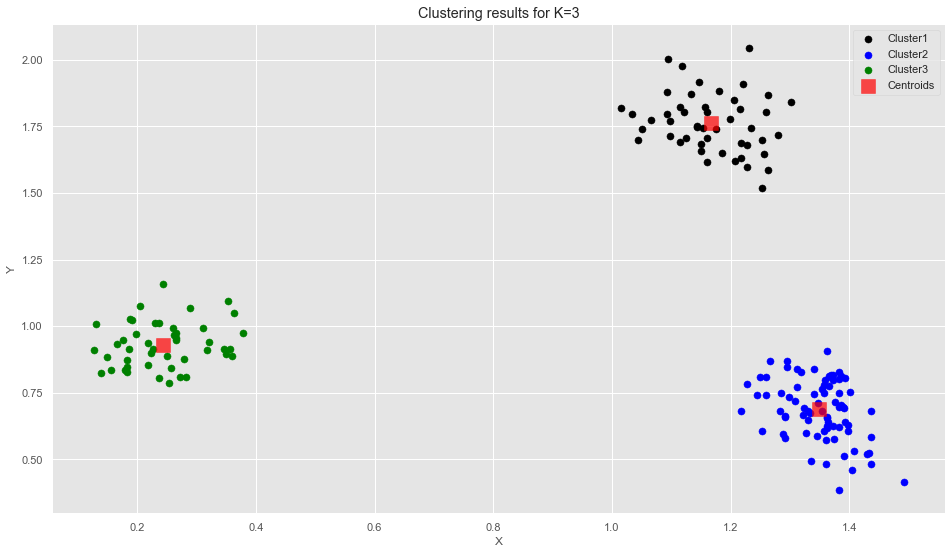

In [52]:
#Visualising the clusters for k=4
plt.scatter(X[y_means==0,0],X[y_means==0,1],s=50, c='black',label='Cluster1')
plt.scatter(X[y_means==1,0],X[y_means==1,1],s=50, c='blue',label='Cluster2')
plt.scatter(X[y_means==2,0],X[y_means==2,1],s=50, c='green',label='Cluster3')


plt.scatter(km3.cluster_centers_[:,0], km3.cluster_centers_[:,1],s=200,marker='s', c='red', alpha=0.7, label='Centroids')
plt.title('Clustering results for K=3')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

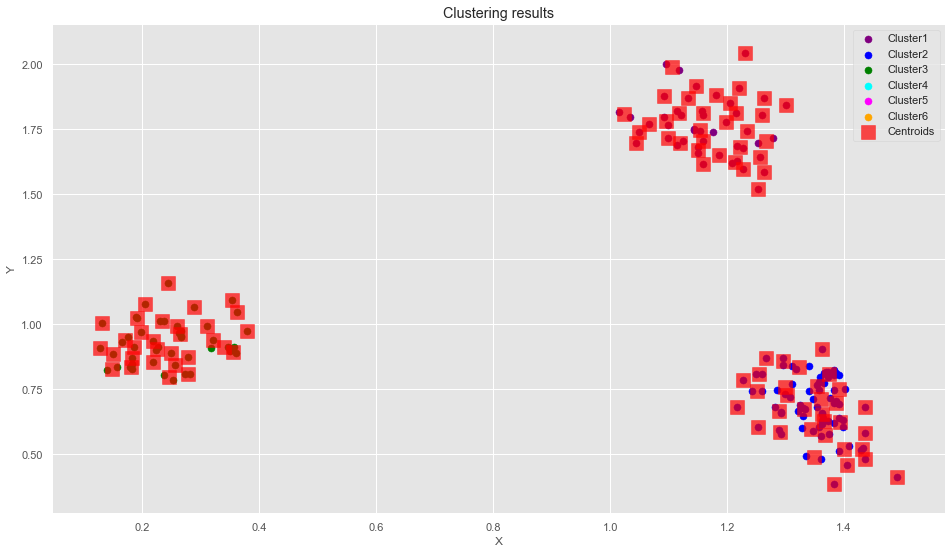

In [46]:
plt.scatter(X[y_means==0,0],X[y_means==0,1],s=50, c='purple',label='Cluster1')
plt.scatter(X[y_means==1,0],X[y_means==1,1],s=50, c='blue',label='Cluster2')
plt.scatter(X[y_means==2,0],X[y_means==2,1],s=50, c='green',label='Cluster3')
plt.scatter(X[y_means==3,0],X[y_means==3,1],s=50, c='cyan',label='Cluster4')
plt.scatter(X[y_means==4,0],X[y_means==4,1],s=50, c='magenta',label='Cluster5')
plt.scatter(X[y_means==5,0],X[y_means==5,1],s=50, c='orange',label='Cluster6')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1],s=200,marker='s', c='red', alpha=0.7, label='Centroids')
plt.title('Clustering results')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

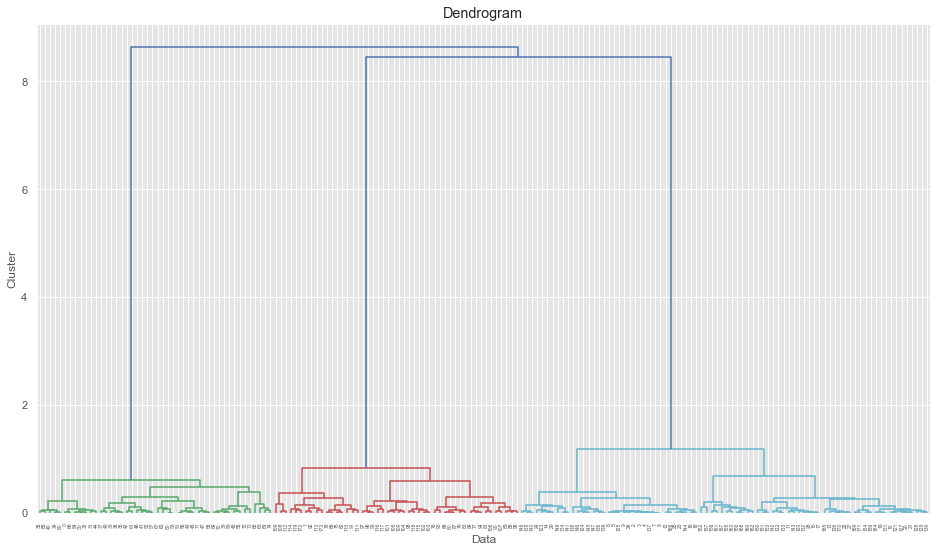

In [47]:
import scipy.cluster.hierarchy as sch
dend=sch.dendrogram(sch.linkage(X, method='ward'))
plt.title("Dendrogram")
plt.xlabel('Data')
plt.ylabel('Cluster')
plt.show()

In [48]:
# Fitting Hierarchical Clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward' )
y_hc = hc.fit_predict(X)

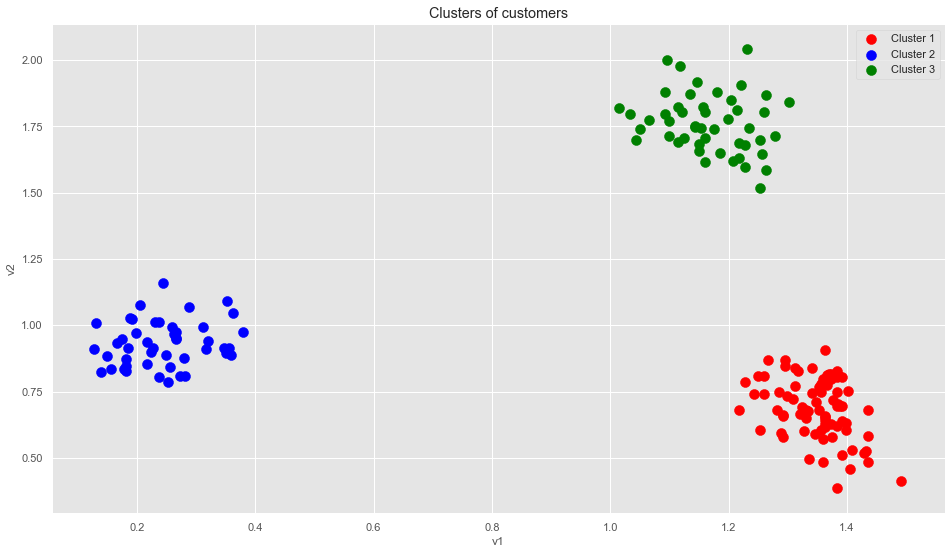

In [49]:
# Visualising the clusters
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
# plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
# plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
# plt.scatter(X[y_hc == 5, 0], X[y_hc == 5, 1], s = 100, c = 'orange', label = 'Cluster 6')

plt.title('Clusters of customers')
plt.xlabel('v1')
plt.ylabel('v2')
plt.legend()
plt.show()